In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [56]:
dataset = pd.read_csv(r"E:\Machine Learning\house_price_data.csv")
dataset.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,4,3.73,3439,6530,1.4,1,2,4,3751,0,1999,2005,601108
1,5,1.78,1984,5413,1.0,0,1,3,3794,412,1952,0,734421
2,3,2.99,1363,4748,1.0,0,0,4,3309,0,1922,2010,1517077


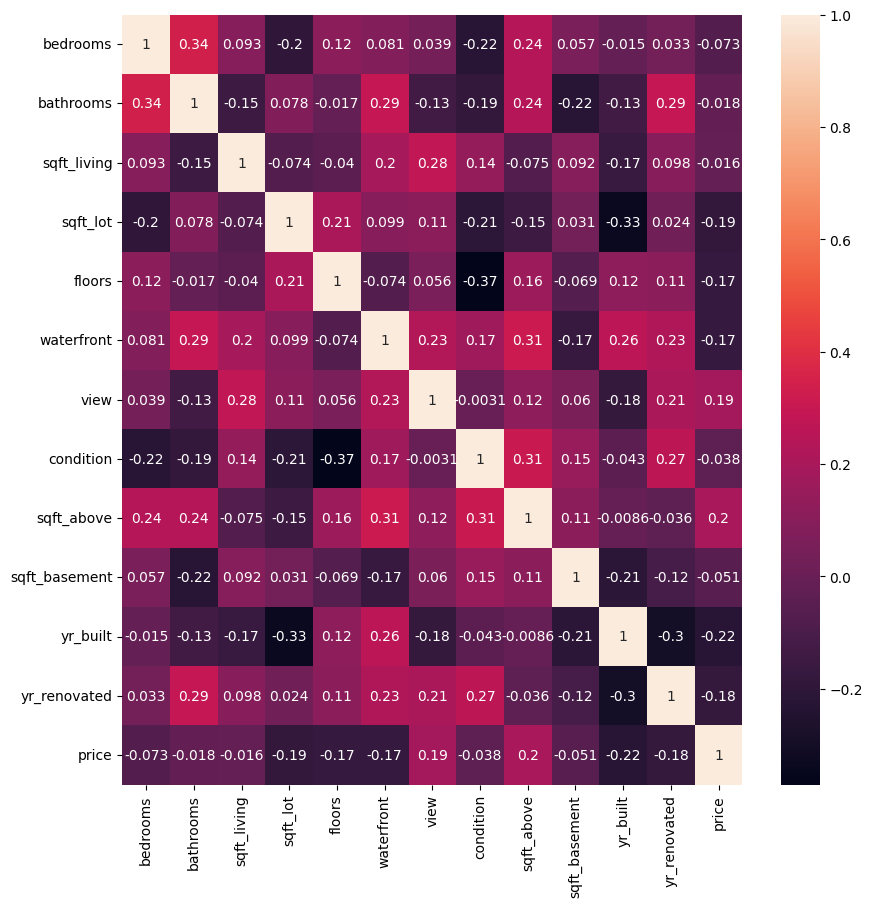

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [58]:
x = dataset.iloc[:,:-1]
y = dataset["price"]

In [59]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression , Lasso, Ridge

# Linear Regression

In [62]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

-459.0564433921366

In [74]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

232921956068.99365
439892.77295123244
482619.8877677894


In [63]:
lr.coef_

array([-6.48417676e+04,  3.03287418e+04, -1.56797740e+05, -2.48830144e+05,
        5.42759916e+04,  1.65891834e-09,  1.67849685e+05, -4.87860053e+04,
        6.70976167e+04, -4.36519748e+04, -2.37495441e+05, -2.64345911e+05])

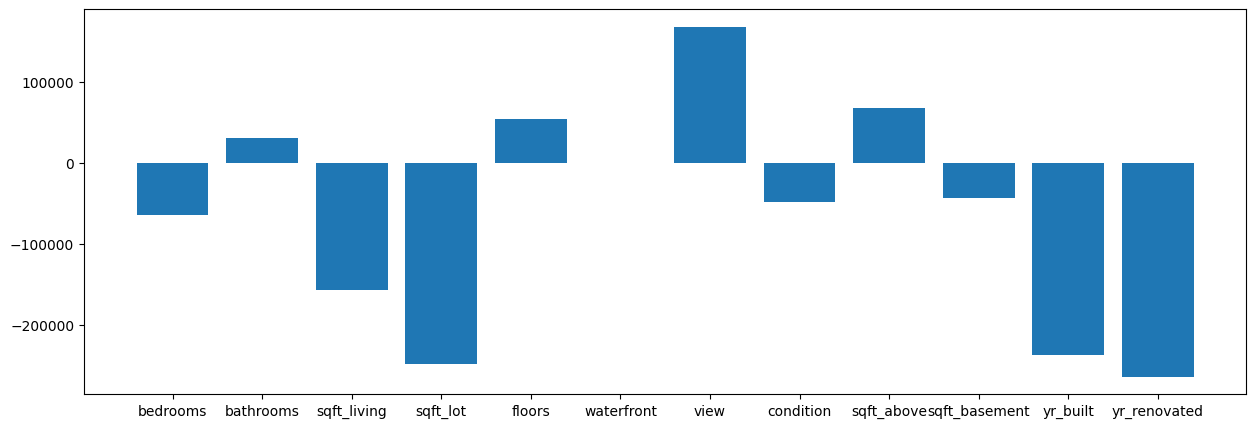

In [65]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_ )
plt.show()

# Lasso

In [66]:
la = Lasso(alpha=0.5)
la.fit(x_train,y_train)
la.score(x_test,y_test)

-4.59034567065054

In [75]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

232912841646.01202
439882.11528236885
482610.44502373965


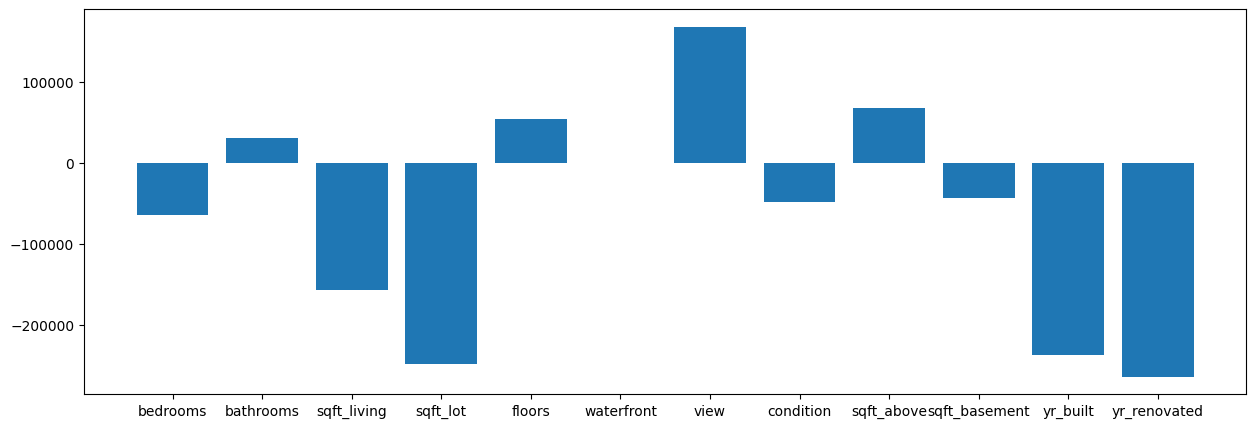

In [67]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_ )
plt.show()

# Ridge

In [68]:
ri = Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

-91.64716717963427

In [76]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

79846737448.74634
236219.0921549527
282571.65011505724


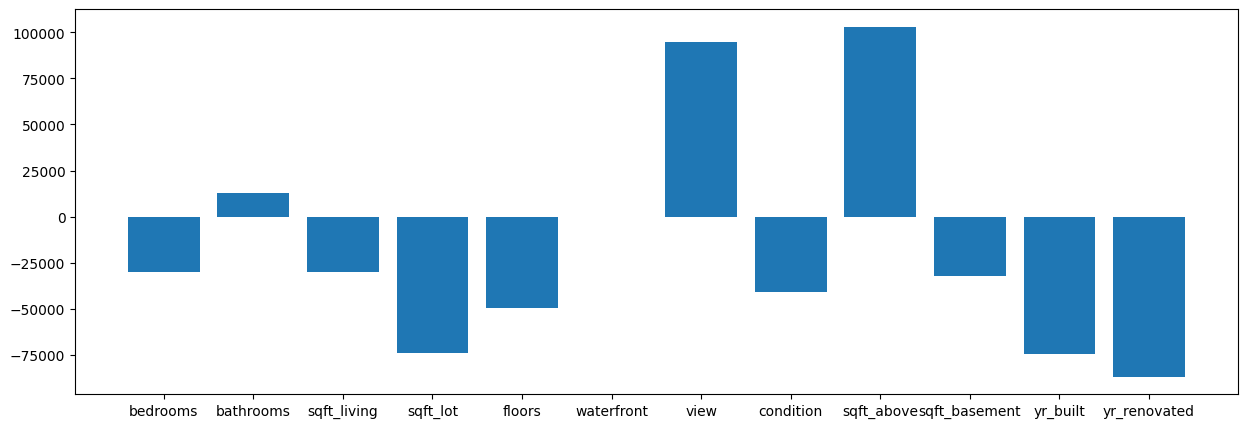

In [69]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_ )
plt.show()

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
# ridge have high accuracy

In [77]:
df = pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})